In [1]:
#import findspark as fs
#fs.init()


import pyspark

sc = pyspark.SparkContext()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/07 14:50:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/07 14:50:38 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
array = sc.parallelize([1,2,3])
array.map(lambda x : x*2).take(3)

[2, 4, 6]

#### Word count sul file "README.md".####
Utilizzando la funzione sortByKey, qual è la **terza** parola più frequente?

In [3]:
file = sc.textFile("README.md")
file.take(5)

['# Apache Spark',
 '',
 'Spark is a fast and general cluster computing system for Big Data. It provides',
 'high-level APIs in Scala, Java, Python, and R, and an optimized engine that',
 'supports general computation graphs for data analysis. It also supports a']

In [4]:
split = file.flatMap(lambda line: line.split())
split.take(5)

['#', 'Apache', 'Spark', 'Spark', 'is']

In [5]:
tuples = split.map(lambda word: (word,1))
tuples.take(5)

[('#', 1), ('Apache', 1), ('Spark', 1), ('Spark', 1), ('is', 1)]

In [6]:
reduced = tuples.reduceByKey(lambda a,b:a+b)
reduced.take(25)

[('#', 1),
 ('fast', 1),
 ('and', 10),
 ('general', 3),
 ('computing', 1),
 ('for', 12),
 ('Big', 1),
 ('It', 2),
 ('Scala,', 1),
 ('Python,', 2),
 ('an', 4),
 ('optimized', 1),
 ('supports', 2),
 ('analysis.', 1),
 ('set', 2),
 ('of', 5),
 ('higher-level', 1),
 ('SQL', 2),
 ('MLlib', 1),
 ('machine', 1),
 ('learning,', 1),
 ('GraphX', 1),
 ('graph', 1),
 ('processing,', 1),
 ('##', 9)]

In [7]:
swapped = reduced.map(lambda tuple: (tuple[1],tuple[0]))
swapped.take(5)

[(1, '#'), (1, 'fast'), (10, 'and'), (3, 'general'), (1, 'computing')]

In [8]:
result = swapped.sortByKey(False)
result.take(5)

[(24, 'the'), (17, 'to'), (16, 'Spark'), (12, 'for'), (10, 'and')]

La **terza** parola più frequente è

In [9]:
result.take(3)[2][1]

'Spark'

In [10]:
thirdMost = sc.textFile("README.md").flatMap(lambda line: line.split()) \
                                    .map(lambda word: (word,1)) \
                                    .reduceByKey(lambda a,b:a+b) \
                                    .map(lambda tuple: (tuple[1],tuple[0])) \
                                    .sortByKey(False) \
                                    .take(3)[2][1]

'La terza parola più frequente è '+thirdMost

'La terza parola più frequente è Spark'

In [11]:
from random import random
from operator import add
n = 1000

def f(_):
    x = random() * 2 - 1
    y = random() * 2 - 1
    return 1 if x ** 2 + y ** 2 <= 1 else 0

count = sc.parallelize(range(1, n + 1)).map(f).reduce(add)
print("Pi is roughly %f" % (4.0 * count / n))

Pi is roughly 3.240000


#### Dati temperatura ####

Qual è la temperatura massima registrata a Locarno?

In [12]:
locarno = sc.textFile("locarno.txt")
locarno.take(15)

[' ',
 '',
 'stn;time;tre200s0',
 'OTL;198701310000;-1.5',
 'OTL;198701310010;-1.4',
 'OTL;198701310020;-1.4',
 'OTL;198701310030;-1.4',
 'OTL;198701310040;-1.5',
 'OTL;198701310050;-1.5',
 'OTL;198701310100;-1.5',
 'OTL;198701310110;-1.6',
 'OTL;198701310120;-1.6',
 'OTL;198701310130;-1.6',
 'OTL;198701310140;-1.6',
 'OTL;198701310150;-1.7']

In [13]:
# filter out bad lines

def clean(line):
    if line.strip() != "":
        try:
            float(line.split(";")[2])
            return True
        except:
            return False
    return False

cleaned = locarno.filter(clean)
cleaned.take(5)

['OTL;198701310000;-1.5',
 'OTL;198701310010;-1.4',
 'OTL;198701310020;-1.4',
 'OTL;198701310030;-1.4',
 'OTL;198701310040;-1.5']

In [14]:
tuples = cleaned.map(lambda line: (line.split(";")[1][0:4],float(line.split(";")[2])))
tuples.take(5)

[('1987', -1.5),
 ('1987', -1.4),
 ('1987', -1.4),
 ('1987', -1.4),
 ('1987', -1.5)]

In [15]:
result2 = tuples.reduceByKey(lambda a,b: max(a,b))
result2.take(30)

[('1988', 30.3),
 ('1990', 32.2),
 ('1995', 32.5),
 ('1999', 29.8),
 ('2000', 32.0),
 ('2004', 31.9),
 ('2005', 32.0),
 ('2008', 31.2),
 ('2010', 32.6),
 ('2011', 32.5),
 ('2013', 33.5),
 ('2014', 32.2),
 ('2017', 34.5),
 ('2018', 35.0),
 ('2019', 35.5),
 ('2020', 34.4),
 ('2021', 33.7),
 ('2023', 34.9),
 ('1987', 30.0),
 ('1989', 32.7),
 ('1991', 31.9),
 ('1992', 33.2),
 ('1993', 32.3),
 ('1994', 34.0),
 ('1996', 33.2),
 ('1997', 30.4),
 ('1998', 33.6),
 ('2001', 31.2),
 ('2002', 31.6),
 ('2003', 37.9)]

In [16]:
result22 = result2.takeOrdered(30,lambda t: -t[1])
result22

[('2003', 37.9),
 ('2015', 36.8),
 ('2019', 35.5),
 ('2018', 35.0),
 ('2023', 34.9),
 ('2022', 34.9),
 ('2017', 34.5),
 ('2020', 34.4),
 ('2006', 34.4),
 ('1994', 34.0),
 ('2012', 33.9),
 ('2021', 33.7),
 ('1998', 33.6),
 ('2013', 33.5),
 ('1992', 33.2),
 ('1996', 33.2),
 ('1989', 32.7),
 ('2010', 32.6),
 ('1995', 32.5),
 ('2011', 32.5),
 ('1993', 32.3),
 ('1990', 32.2),
 ('2014', 32.2),
 ('2000', 32.0),
 ('2005', 32.0),
 ('2007', 32.0),
 ('2004', 31.9),
 ('1991', 31.9),
 ('2016', 31.8),
 ('2002', 31.6)]

Qual è la temperatura media per anno registrata a Lugano?

In [17]:
lugano = sc.textFile("lugano.txt")

In [18]:
cleaned = lugano.filter(clean)
cleaned.take(5)

['LUG;198701310000;-0.5',
 'LUG;198701310010;-0.7',
 'LUG;198701310020;-0.5',
 'LUG;198701310030;-0.7',
 'LUG;198701310040;-0.7']

Per ogni riga creiamo una tupla **``(anno, temperatura)``**

In [19]:
tuples = cleaned.map(lambda line: (line.split(";")[1][0:4],float(line.split(";")[2])))
tuples.take(5)

[('1987', -0.5),
 ('1987', -0.7),
 ('1987', -0.5),
 ('1987', -0.7),
 ('1987', -0.7)]

Per ogni tupla (anno, temperatura) creaiamo una tupla **``(anno, (temperatura, 1))``**

In [20]:
tuples2 = tuples.map(lambda t: (t[0], (t[1],1)))
tuples2.take(5)

[('1987', (-0.5, 1)),
 ('1987', (-0.7, 1)),
 ('1987', (-0.5, 1)),
 ('1987', (-0.7, 1)),
 ('1987', (-0.7, 1))]

Riduciamo le tuple per chiave. La funzione prende due tuple in ingresso e crea una nuova tupla con a somma delle due chiavi e la somme dei due valori:

esempio:

``('1987', (-1.8, 1)) , ('1987', (-1.8, 1)) -> ('1987', (-3.6, 2))``


Alla fine della riduzione otteniamo una lista di tuple:

**``(anno, (somma temperature per l'anno, conteggio delle temperature))``**

In [21]:
tuples3 = tuples2.reduceByKey(lambda a,b: (a[0]+b[0],a[1]+b[1]))
tuples3.take(5)

[('1988', (652553.3000000002, 52704)),
 ('1990', (665311.4000000082, 52560)),
 ('1995', (655313.599999996, 52560)),
 ('1999', (661101.1000000001, 52560)),
 ('2000', (683230.6999999989, 52704))]

Calcoliamo la media per gni anno.

Esempio:

``('1990', (636838.6999999977, 52560))  -> ('1990', (636838.6999999977/52560)) -> ('1990', 12.116413622526593)``


In [22]:
result3 = tuples3.map(lambda t: (t[0],t[1][0]/t[1][1])).sortByKey()
result3.cache
result3.take(25)

[('1987', 12.609940079754475),
 ('1988', 12.381475789313907),
 ('1989', 12.285871385083706),
 ('1990', 12.658131659056473),
 ('1991', 12.365108909379032),
 ('1992', 12.377701882209953),
 ('1993', 12.131948249619393),
 ('1994', 13.190601217655882),
 ('1995', 12.467914764079072),
 ('1996', 12.105940725561618),
 ('1997', 13.00314117199389),
 ('1998', 12.460222602739831),
 ('1999', 12.578027016742771),
 ('2000', 12.963545461445031),
 ('2001', 12.767404870623942),
 ('2002', 13.149815449010502),
 ('2003', 13.756527447436167),
 ('2004', 12.64842896174871),
 ('2005', 12.611093987823436),
 ('2006', 13.100783866058082),
 ('2007', 13.577500000000091),
 ('2008', 12.660902398300005),
 ('2009', 13.219463470319655),
 ('2010', 12.164147640791622),
 ('2011', 13.580441400304686)]

Visualizziamo il risultato

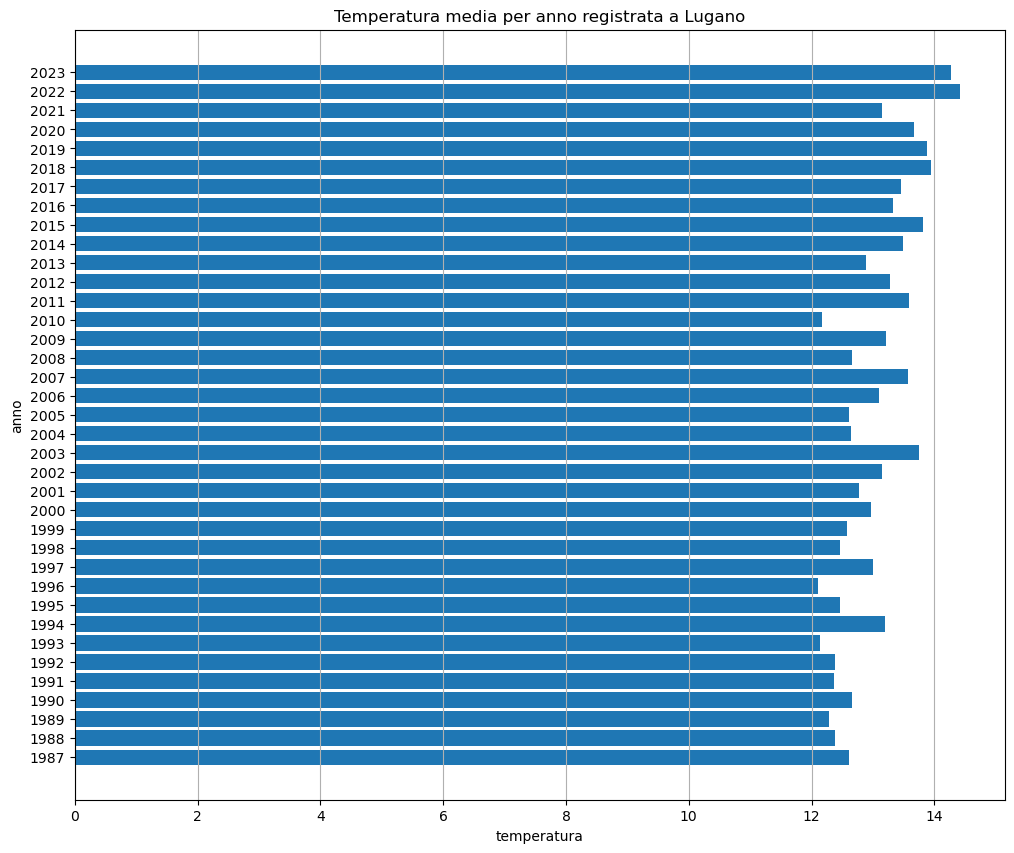

In [23]:
import matplotlib.pyplot as plt

count = result3.map(lambda x: x[1]).collect()
year = result3.map(lambda x: x[0]).collect()

fig, ax = plt.subplots(figsize=(12,10))

ax.barh(range(len(count)), count)
ax.set_yticks(range(len(count)))
ax.set_yticklabels(year)
ax.set_xlabel('temperatura')
ax.set_ylabel('anno')
ax.set_title('Temperatura media per anno registrata a Lugano')
ax.xaxis.grid()
plt.show()

Qual è la temperatura media per mese per tutti i dati (Lugano + Locarno)?

In [24]:
lugloc = sc.textFile("lugano.txt,locarno.txt")

Stesso procedimento di prima, su entrambi i file. Calcolo medio per mese.

In [25]:
def tempMonth(rdd):
    return rdd.filter(clean)\
            .map(lambda line: (line.split(";")[1][4:6],float(line.split(";")[2])))\
            .map(lambda t: (t[0], (t[1],1)))\
            .reduceByKey(lambda a,b: (a[0]+b[0],a[1]+b[1]))\
            .map(lambda t: (t[0],t[1][0]/t[1][1]))\
            .sortByKey()

result4 = tempMonth(lugloc)
result4.take(5)

[('01', 3.9201358429567454),
 ('02', 5.3533454945391075),
 ('03', 9.106399040689233),
 ('04', 12.253278278278485),
 ('05', 16.28282839290924)]

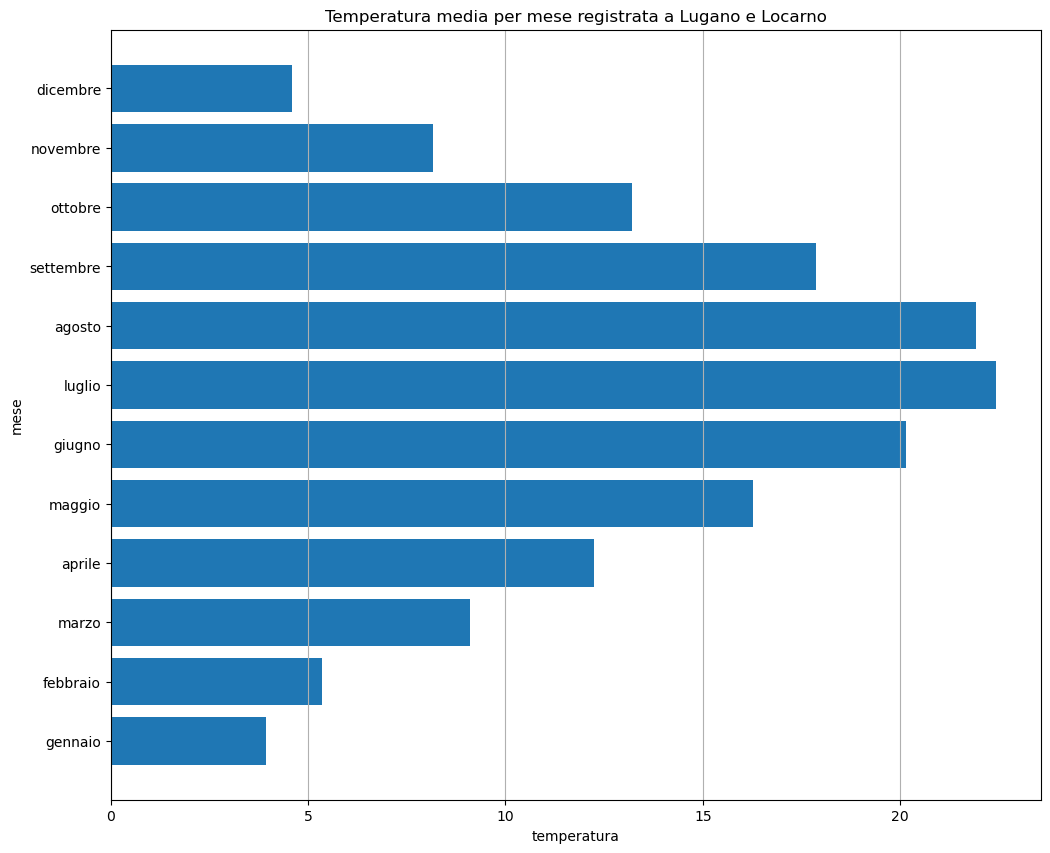

In [26]:
count = result4.map(lambda x: x[1]).collect()
year = result4.map(lambda x: x[0]).collect()

fig, ax = plt.subplots(figsize=(12,10))

ax.barh(range(len(count)), count)
ax.set_yticks(range(len(count)))
ax.set_yticklabels(["gennaio", "febbraio", "marzo", "aprile", "maggio", "giugno", "luglio", "agosto", "settembre", "ottobre", "novembre", "dicembre"])
ax.set_xlabel('temperatura')
ax.set_ylabel('mese')
ax.set_title('Temperatura media per mese registrata a Lugano e Locarno')
ax.xaxis.grid()
plt.show()